In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import  loadmat
from sklearn.svm import SVC
from collections import Counter
from operator import itemgetter
from processEmail import *
from emailFeatures import *
from getVocabList import *

# Email preprocessing

In [2]:
# Process email
file_contents = open('emailSample1.txt', 'r').read()
word_indices = processEmail(file_contents)
# Print Stats
print('Word Indices: \n', word_indices)


==== Processed Email ====

 anyon know how much it cost to host a web portal well it depend on how mani visitor you re expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr 


Word Indices: 
 ['86', '916', '794', '1077', '883', '370', '1699', '790', '1822', '1831', '883', '431', '1171', '794', '1002', '1893', '1364', '592', '1676', '238', '162', '89', '688', '945', '1663', '1120', '1062', '1699', '375', '1162', '479', '1893', '1510', '799', '1182', '1237', '810', '1895', '1440', '1547', '181', '1699', '1758', '1896', '688', '1676', '992', '961', '1477', '71', '530', '1699', '531']


# Feature extraction

In [3]:
# Extract Features
features = emailFeatures(word_indices)
# Print Stats
print('Length of feature vector: %d' % (len(features)))
print('Number of non-zero entries: %d' % (Counter(features)[1]))

Length of feature vector: 1899
Number of non-zero entries: 45


# Train linear SVM for spam classification

In [4]:
# Load the Spam Email dataset
data = loadmat('spamTrain.mat')
X = data['X']
y = data['y']
# Load the test dataset
datatest = loadmat('spamTest.mat')
Xtest = datatest['Xtest']
ytest = datatest['ytest']

In [5]:
C = 0.1
clf = SVC(C=C, kernel='linear')
clf.fit(X, y.ravel())
print('Training Accuracy: %g' % (clf.score(X, y) * 100))
print('Test Accuracy: %g' % (clf.score(Xtest, ytest) * 100))

Training Accuracy: 99.825
Test Accuracy: 98.9


# Top Predictors of Spam

In [6]:
# Sort the weights 
vocabList = getVocabList()
importances = sorted([(list(vocabList.keys())[list(vocabList.values()).index(str(idx + 1))], clf.coef_.ravel()[idx]) for idx in np.argsort(clf.coef_).ravel()], key=itemgetter(1), reverse=True)

Text(0.5, 1.0, 'Top predictors of spam as relative importance')

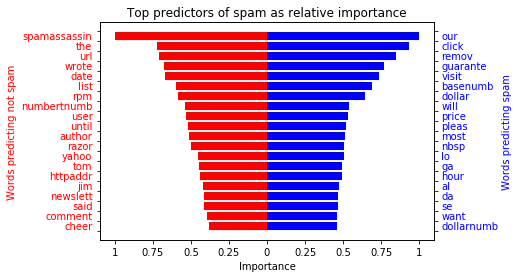

In [7]:
# Plot top predictors of spam

def plotRelImp(ax, feature_names, weights, **kwargs):
    """
    Plot relative importances of features based on their weights
    """
    max_weights = max(abs(weight) for weight in weights)
    n_features = len(feature_names)
    ax.barh(range(n_features), [weight / max_weights for weight in weights], **kwargs)
    ax.set_yticks(np.arange(-0.5, n_features, 1))
    ax.set_yticklabels(feature_names, va='bottom', **kwargs)
    return ax

# Top words as predictors of importance with their weights
n_top = 20
top_words = (lambda l: l[:n_top] + l[-n_top:])([imp[0] for imp in importances])
top_weights = (lambda l: l[:n_top] + l[-n_top:])([imp[1] for imp in importances])
# Plot highest (in absolute value) weights 
_, ax = plt.subplots()
# Negative weights
ax_neg = ax
plotRelImp(ax_neg, top_words[-n_top:], top_weights[-n_top:], color='r')
ax.set_ylabel('Words predicting not spam', color='r')
# Positive weights
ax_pos = ax_neg.twinx()
plotRelImp(ax_pos, top_words[:n_top][::-1], top_weights[:n_top][::-1], color='b')
ax_pos.set_ylabel('Words predicting spam', color='b')
# Axe info
ax.set_xticklabels(['{:g}'.format(abs(tick)) for tick in ax.get_xticks()])
ax.set_xlabel('Importance')
ax.set_title('Top predictors of spam as relative importance')

In [8]:
def printIsSpam(email_contents):
    email_features = np.array(emailFeatures(processEmail(email_contents)))[np.newaxis, :]
    print('===> ' + ('Spam' if clf.predict(email_features) else 'Not spam'))

In [9]:
email_contents = open('emailSample1.txt', 'r').read()
printIsSpam(email_contents)


==== Processed Email ====

 anyon know how much it cost to host a web portal well it depend on how mani visitor you re expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr 


===> Not spam


In [10]:
email_contents = open('emailSample2.txt', 'r').read()
printIsSpam(email_contents)


==== Processed Email ====

folk my first time post have a bit of unix experi but am new to linux just got a new pc at home dell box with window xp ad a second hard disk for linux partit the disk and have instal suse number number from cd which went fine except it didn t pick up my monitor i have a dell brand enumberfpp number lcd flat panel monitor and a nvidia geforcenumb tinumb video card both of which are probabl too new to featur in suse s default set i download a driver from the nvidia websit and instal it use rpm then i ran saxnumb as wa recommend in some post i found on the net but it still doesn t featur my video card in the avail list what next anoth problem i have a dell brand keyboard and if i hit cap lock twice the whole machin crash in linux not window even the on off switch is inact leav me to reach for the power cabl instead if anyon can help me in ani way with these prob i d be realli grate i ve search the net but have run out of idea or should i be go for a differ ver

In [11]:
email_contents = open('spamSample1.txt', 'r').read()
printIsSpam(email_contents)


==== Processed Email ====

do you want to make dollarnumb or more per week if you are a motiv and qualifi individu i will person demonstr to you a system that will make you dollarnumb number per week or more thi is not mlm call our number hour pre record number to get the detail number number number i need peopl who want to make seriou money make the call and get the fact invest number minut in yourself now number number number look forward to your call and i will introduc you to peopl like yourself who are current make dollarnumb number plu per week number number number numberljgvnumb numberleannumberlrmsnumb numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 


===> Spam


In [12]:
email_contents = open('spamSample2.txt', 'r').read()
printIsSpam(email_contents)


==== Processed Email ====

best buy viagra gener onlin viagra numbermg x number pill dollarnumb free pill reorder discount top sell number qualiti satisfact guarante we accept visa master e check payment number satisfi custom httpaddr 


===> Spam
